In [ ]:
#Apple Quality Prediction:A Machine Learning Project

: 

In [23]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\apple_quality.csv")
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [28]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [29]:
#Attributes (Features):

In [5]:
# Option 1: Drop the 'A_id' column
df = df.drop('A_id', axis=1)

In [6]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [7]:
df['Size']

0      -3.970049
1      -1.195217
2      -0.292024
3      -0.657196
4       1.364217
          ...   
3995    0.059386
3996   -0.293118
3997   -2.634515
3998   -4.008004
3999    0.278540
Name: Size, Length: 4000, dtype: float64

In [8]:
df['Weight']

0      -2.512336
1      -2.839257
2      -1.351282
3      -2.271627
4      -1.296612
          ...   
3995   -1.067408
3996    1.949253
3997   -2.138247
3998   -1.779337
3999   -1.715505
Name: Weight, Length: 4000, dtype: float64

In [9]:
df['Sweetness']

0       5.346330
1       3.664059
2      -1.738429
3       1.324874
4      -0.384658
          ...   
3995   -3.714549
3996   -0.204020
3997   -2.440461
3998    2.366397
3999    0.121217
Name: Sweetness, Length: 4000, dtype: float64

In [10]:
df['Crunchiness']

0      -1.012009
1       1.588232
2      -0.342616
3      -0.097875
4      -0.553006
          ...   
3995    0.473052
3996   -0.640196
3997    0.657223
3998   -0.200329
3999   -1.154075
Name: Crunchiness, Length: 4000, dtype: float64

In [11]:
df['Juiciness']

0       1.844900
1       0.853286
2       2.838636
3       3.637970
4       3.030874
          ...   
3995    1.697986
3996    0.024523
3997    2.199709
3998    2.161435
3999    1.266677
Name: Juiciness, Length: 4000, dtype: float64

In [12]:
df['Ripeness']

0       0.329840
1       0.867530
2      -0.038033
3      -3.413761
4      -1.303849
          ...   
3995    2.244055
3996   -1.087900
3997    4.763859
3998    0.214488
3999   -0.776571
Name: Ripeness, Length: 4000, dtype: float64

In [13]:
df['Acidity']

0      -0.491590
1      -0.722809
2       2.621636
3       0.790723
4       0.501984
          ...   
3995    0.137784
3996    1.854235
3997   -1.334611
3998   -2.229720
3999    1.599796
Name: Acidity, Length: 4000, dtype: float64

In [14]:
#Target Variable:

In [15]:
# Step 1: Show unique values in the target variable
print("Target Variable 'Quality' values:")
print(df['Quality'].value_counts())

Target Variable 'Quality' values:
Quality
good    2004
bad     1996
Name: count, dtype: int64


In [16]:
# Step 2: Convert 'Good' -> 1, 'Bad' -> 0 (Binary/Categorical)
df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})
print("Converted 'Quality' to binary: Good = 1, Bad = 0")

Converted 'Quality' to binary: Good = 1, Bad = 0


In [17]:
# Step 3: Confirm conversion
print("After conversion:")
print(df['Quality'].value_counts())

After conversion:
Series([], Name: count, dtype: int64)


In [18]:
#Typical Machine Learning Tasks:

In [19]:
# Fruit Classification: 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [25]:
# Step 4: Encode the target variable 'Quality' (e.g., Good -> 1, Bad -> 0)
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])  # Converts labels to 0, 1

In [26]:
# Step 5: Split data into features and target
X = df.drop('Quality', axis=1)
y = df['Quality']

In [27]:
# Step 6: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8725
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       399
           1       0.85      0.91      0.88       401

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



In [7]:
 #Quality Prediction:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [29]:
# Encode the 'Quality' column (Good → 1, Bad → 0)
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])

In [30]:
# Features and Target
X = df.drop('Quality', axis=1)
y = df['Quality']

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.90125
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       401
           1       0.90      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [38]:
#3. Exploratory Data Analysis (EDA)

In [39]:
 #Check the number of rows and columns.

In [40]:
print(df.shape)

(4000, 8)


In [40]:
# Inspect data types for each feature

In [41]:
print(df.dtypes)

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object


In [42]:
# Look for missing values (NaNs) in any column. The dataset is stated to be cleaned,but a verification step is always prudent.

In [43]:
# Check for missing values
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [44]:
 #Target Variable Distribution:

In [45]:
#Analyze the distribution of the Quality variable. If it's binary (e.g., Good/Bad), check
# for class imbalance. If it's multi-class, check the balance across all classes

In [46]:
# Show value counts of Quality
print("Distribution of Quality values:")
print(df['Quality'].value_counts())

Distribution of Quality values:
Quality
0    4000
Name: count, dtype: int64


In [47]:
                  # or

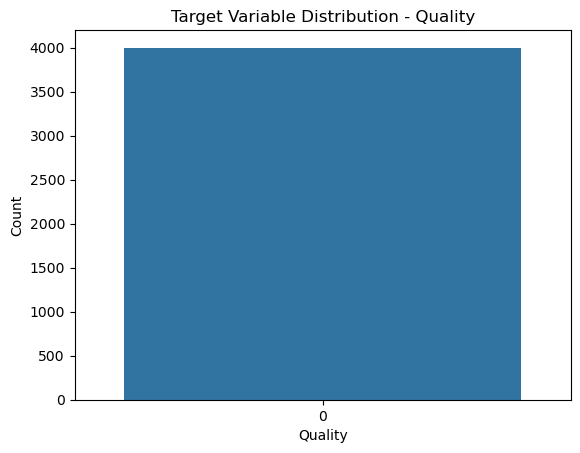

In [48]:
 #Visualize the distribution
sns.countplot(x='Quality', data=df)
plt.title('Target Variable Distribution - Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [49]:
# Univariate Analysis (Individual Features):

In [50]:
#Numerical Features: 

In [51]:
# Drop A_id if present
if 'A_id' in df.columns:
    df = df.drop(columns=['A_id'])

In [52]:
# List of numerical features
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']


In [53]:
# Set plot style
sns.set(style="whitegrid")


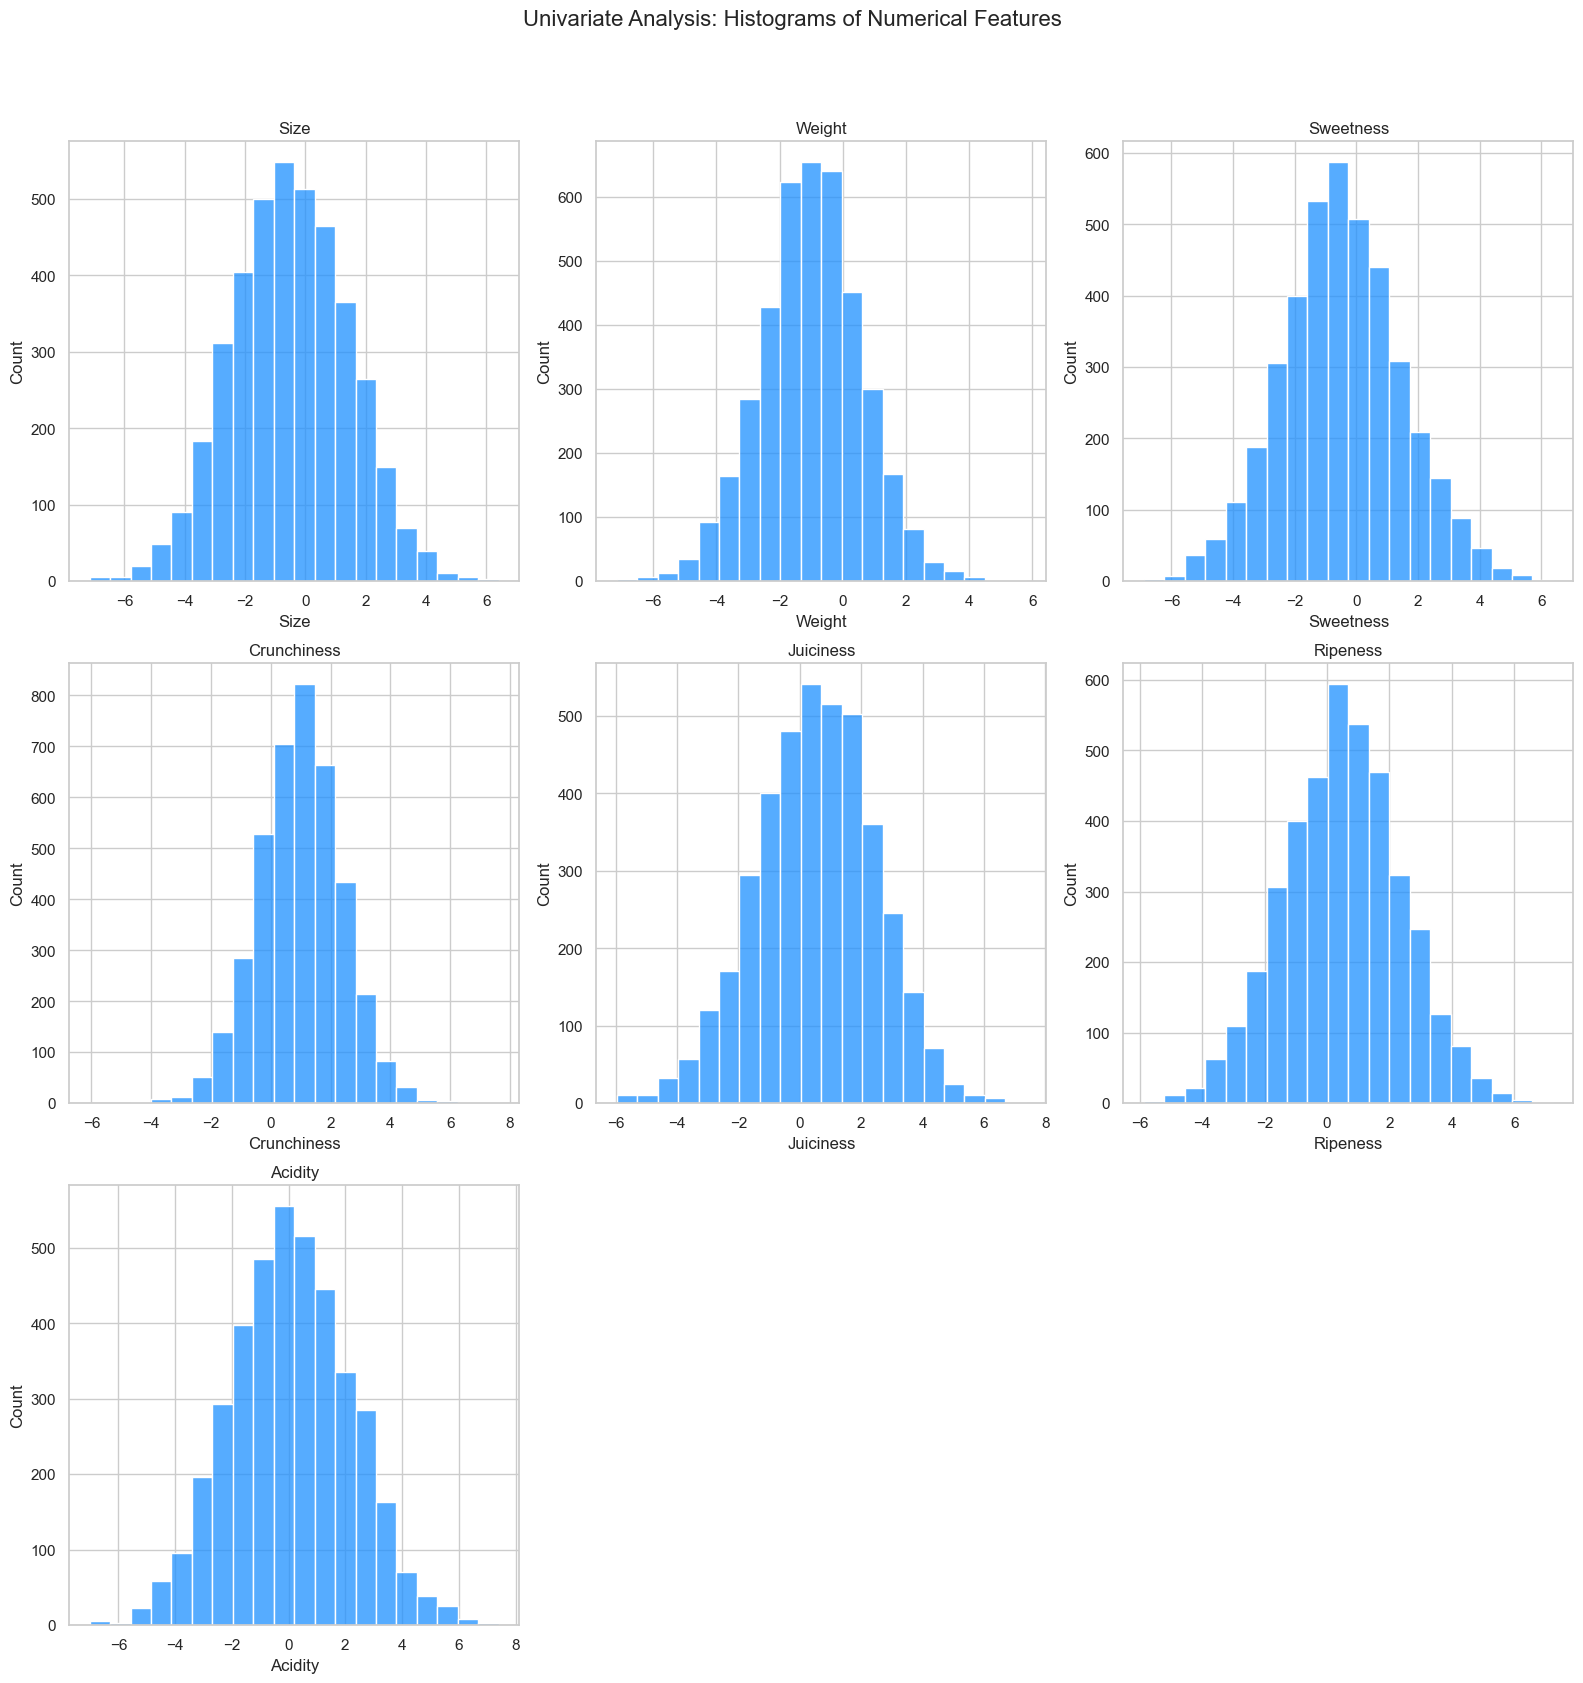

In [54]:
# Step 1: Select numerical features (excluding target/ID)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'Quality' if present
if 'Quality' in numerical_features:
    numerical_features.remove('Quality')

# Step 2: Set plot size and layout
plt.figure(figsize=(16, 22))
plt.suptitle('Univariate Analysis: Histograms of Numerical Features', fontsize=16)

# Step 3: Plot each feature in a grid
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)  # Adjust grid (rows, columns)
    sns.histplot(df[feature], bins=20, kde=False, color='dodgerblue')
    plt.title(feature, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Leave space for suptitle
plt.show()

In [55]:
#• A_id should be inspected but is likely a unique identifier and won't be used directly for modeling

In [56]:
 # Show all column names to verify exact spelling
print("Columns in dataset:", df.columns.tolist())

# Then, if 'A_id' exists:
if 'A_id' in df.columns:
    print("Unique A_id values:", df['A_id'].nunique())
    print("Total rows:", len(df))
else:
    print("'A_id' column not found in the dataset.")

Columns in dataset: ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality']
'A_id' column not found in the dataset.


In [57]:
 #Bivariate Analysis (Feature-Target Relationships):

In [58]:
#Numerical vs. Quality:

In [59]:
# Drop 'A_id' if present
if 'A_id' in df.columns:
    df = df.drop(columns=['A_id'])


In [60]:
# Ensure 'Quality' is treated as categorical
df['Quality'] = df['Quality'].astype('category')


In [61]:
# List of numerical features
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

In [62]:
# Set style
sns.set(style="whitegrid")


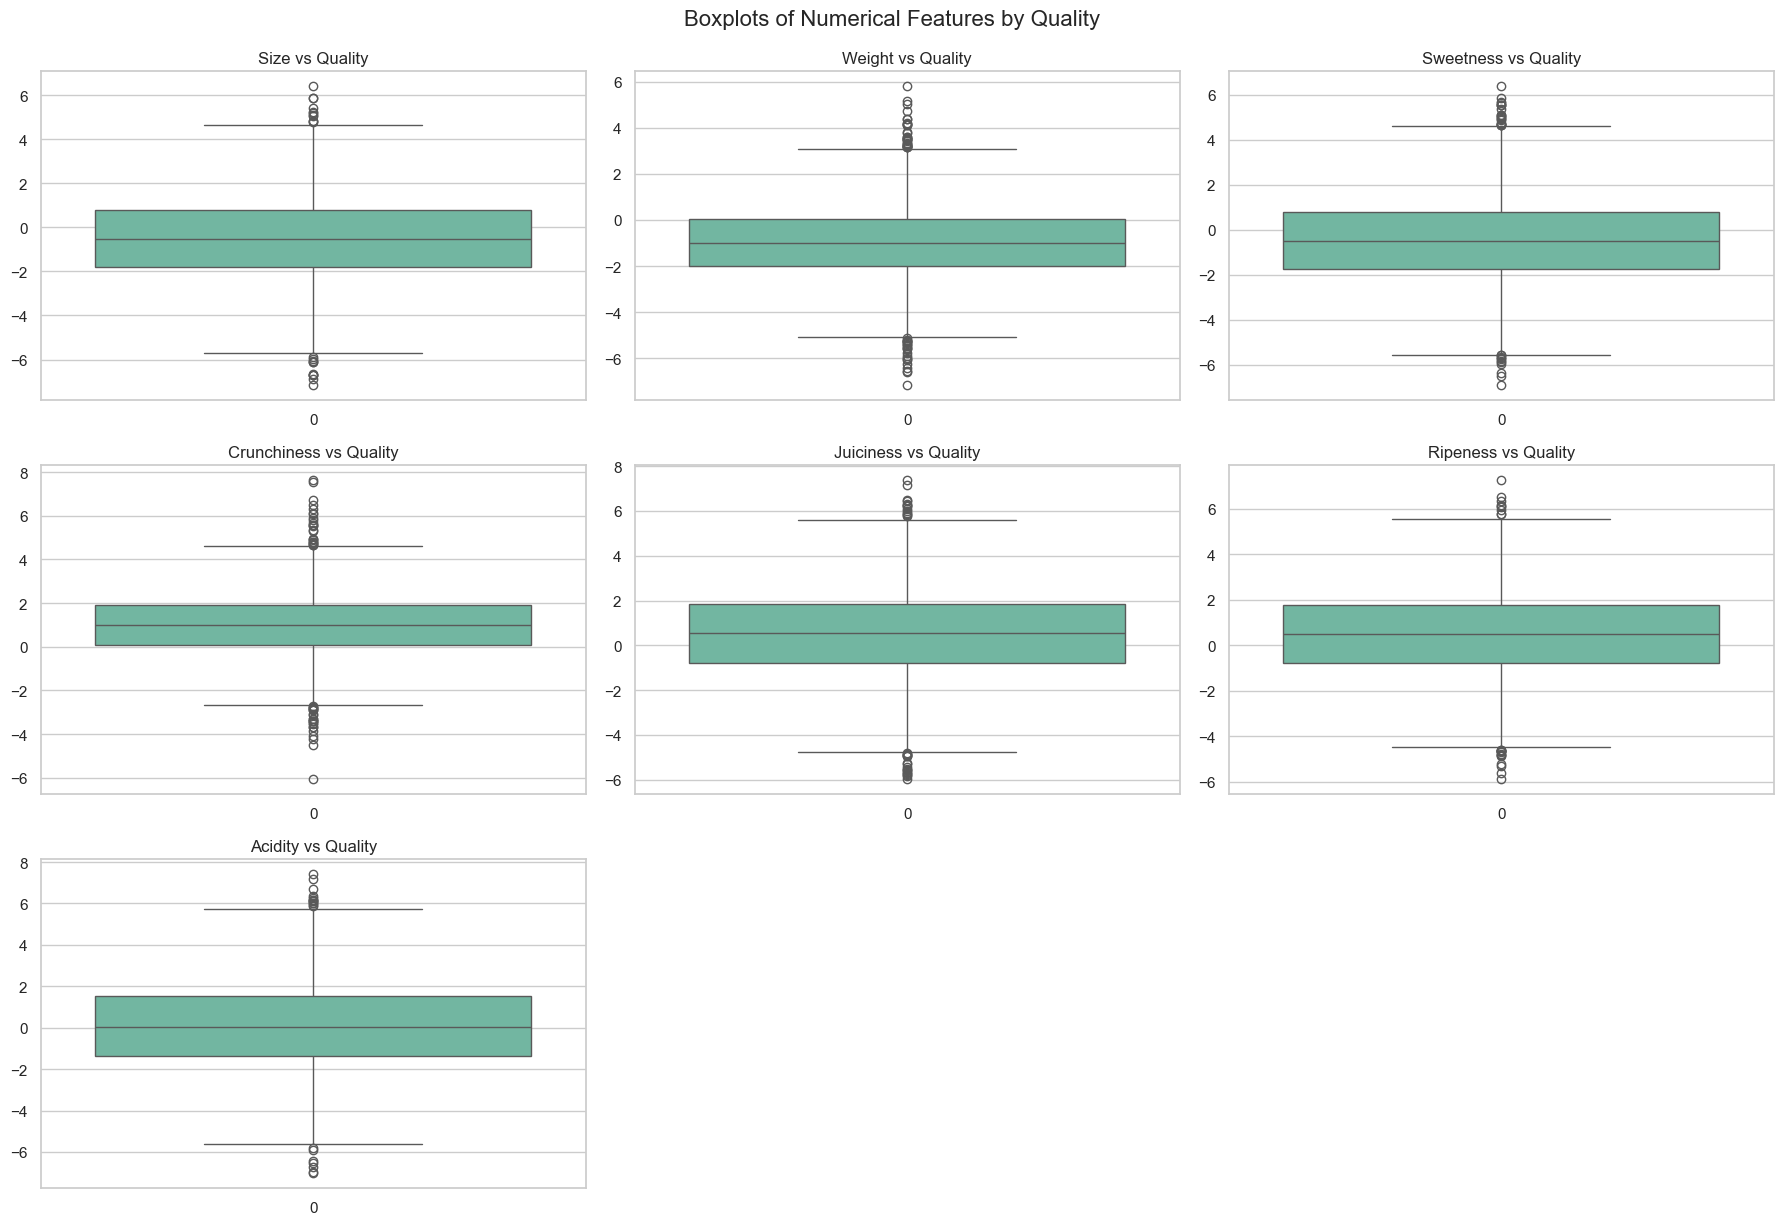

In [63]:
# Plot all boxplots in a grid layout
sns.set(style="whitegrid")
cols = 3
rows = (len(numerical_features) + cols - 1) // cols  # Calculate number of rows needed

plt.figure(figsize=(18, 12))  # Set figure size

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x='Quality', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs Quality')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features by Quality", fontsize=16, y=1.02)
plt.show()

In [64]:
 #Feature Correlations:

In [65]:
# Select only numerical features (excluding A_id and Quality)
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

In [66]:
# Compute correlation matrix
corr_matrix = df[numerical_features].corr()


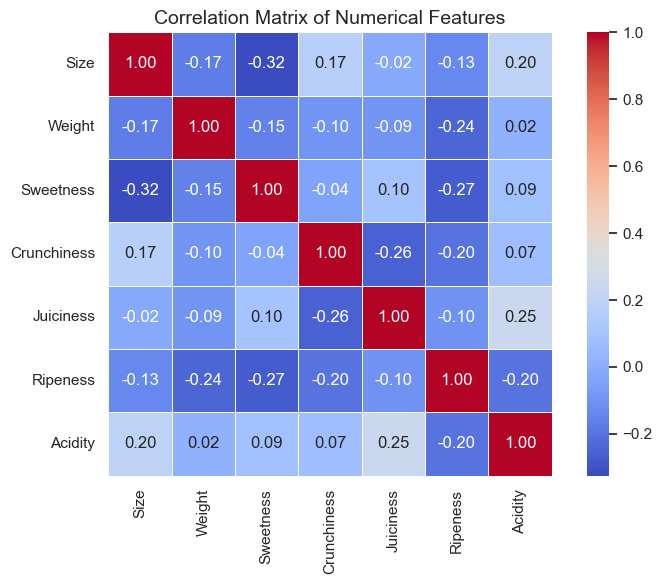

In [67]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

In [68]:
#Outlier Detection:

In [69]:
# List of numerical features
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

In [70]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

    # Detect and count outliers for each feature
for feature in numerical_features:
    outliers = detect_outliers_iqr(df, feature)
    print(f"{feature} → Outliers detected: {len(outliers)}")

Size → Outliers detected: 22
Weight → Outliers detected: 54
Sweetness → Outliers detected: 32
Crunchiness → Outliers detected: 47
Juiciness → Outliers detected: 32
Ripeness → Outliers detected: 24
Acidity → Outliers detected: 20


In [73]:
# Capping example for 'Weight'
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_cap = Q1 - 1.5 * IQR
upper_cap = Q3 + 1.5 * IQR
df['Weight'] = df['Weight'].clip(lower=lower_cap, upper=upper_cap)

In [74]:
#Example EDA Insights to look for:

In [75]:
#What are the typical ranges for 'good' vs. 'bad' quality apples across features like Sweetness or Acidity?

In [76]:

# Ensure Quality is categorical
df['Quality'] = df['Quality'].astype('category')

# Select features to analyze
features = ['Sweetness', 'Acidity']

# Compute statistics grouped by Quality
stats = df.groupby('Quality')[features].agg(['min', 'max', 'mean', 'std']).round(2)

# Display the result
print("Typical Ranges for Good vs Bad Apples:")
print(stats)


Typical Ranges for Good vs Bad Apples:
        Sweetness                   Acidity                 
              min   max  mean   std     min  max  mean   std
Quality                                                     
0           -6.89  6.37 -0.47  1.94   -7.01  7.4  0.08  2.11


In [77]:
 #Are there any clear separations or overlaps in feature distributions between different quality categories?

In [78]:
# Ensure Quality is categorical
df['Quality'] = df['Quality'].astype('category')


In [79]:
# List of numerical features
features = ['Sweetness', 'Acidity', 'Size', 'Weight', 'Crunchiness', 'Juiciness', 'Ripeness']

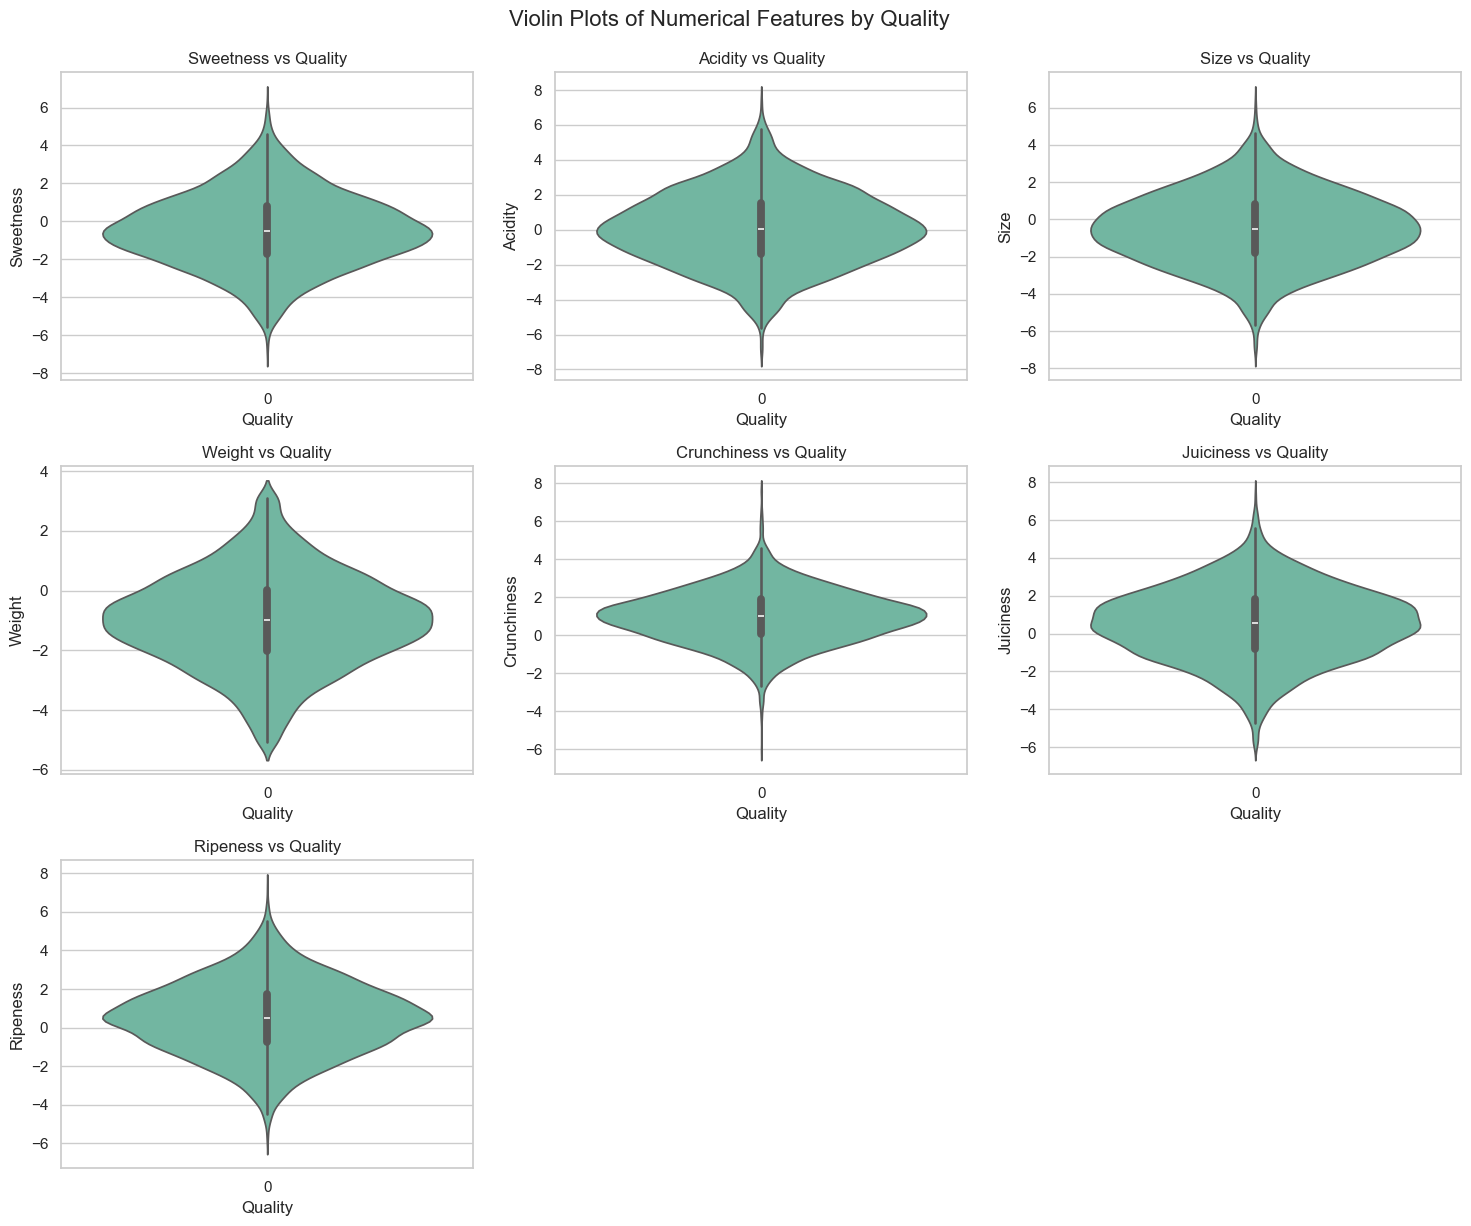

In [80]:
# Create a grid layout (adjust rows/cols as needed)
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # auto calculate rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for idx, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.violinplot(data=df, x='Quality', y=feature, palette='Set2', inner='box')
    plt.title(f'{feature} vs Quality')

plt.tight_layout()
plt.suptitle("Violin Plots of Numerical Features by Quality", fontsize=16, y=1.02)
plt.show()

In [81]:
# Is the Quality variable balanced, or does one class heavily outnumber others?

In [82]:
#Convert Quality to category if it's not already
df['Quality'] = df['Quality'].astype('category')


Quality Value Counts:
Quality
0    4000
Name: count, dtype: int64

Quality Class Distribution (%):
Quality
0    100.0
Name: proportion, dtype: float64


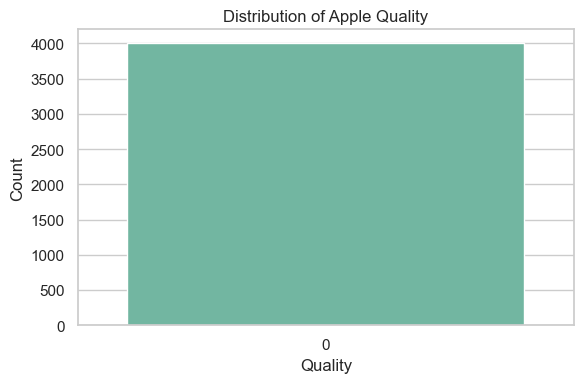

In [83]:
# Count the number of samples in each class
quality_counts = df['Quality'].value_counts()
quality_percent = df['Quality'].value_counts(normalize=True) * 100

# Print counts and percentages
print("Quality Value Counts:")
print(quality_counts)
print("\nQuality Class Distribution (%):")
print(quality_percent.round(2))

# Plot count distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Quality', palette='Set2')
plt.title('Distribution of Apple Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [84]:
# 4. Data Preprocessing

In [85]:
# Feature Removal: 

In [86]:
# Drop the A_id column if it exists
if 'A_id' in df.columns:
    df = df.drop(columns=['A_id'])
    print("'A_id' column dropped successfully.")
else:
    print(" 'A_id' column not found in the dataset.")

 'A_id' column not found in the dataset.


In [87]:
# Handling Missing Values:

In [88]:
# Step 1: Check for missing values
print(" Missing Values per Column:")
print(df.isnull().sum())
# Step 2: Handle missing numerical values using median (robust to outliers)
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
        print(f" Filled missing values in '{col}' with median.")
# Step 3: Handle missing categorical values (if any) using mode
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f" Flled missing values in '{col}' with mode.")

 Missing Values per Column:
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [89]:
# Target Variable Encoding: 

In [90]:
#using mapping
# Check unique values in Quality
print("Before Mapping:", df['Quality'].unique())


Before Mapping: [0]
Categories (1, int64): [0]


In [91]:
# Map string labels to numbers
df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})


In [92]:
# Verify result
print("After Mapping:\n", df['Quality'].value_counts())

After Mapping:
 Series([], Name: count, dtype: int64)


In [93]:
#using label encoding
from sklearn.preprocessing import LabelEncoder

In [94]:
# Create LabelEncoder object
le = LabelEncoder()


In [95]:
# Fit and transform the Quality column
df['Quality'] = le.fit_transform(df['Quality'])


In [96]:
# Check the result
print("After Label Encoding:\n", df['Quality'].value_counts())

After Label Encoding:
 Quality
0    4000
Name: count, dtype: int64


In [97]:
# Feature Scaling:

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
# List of numerical features
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

In [100]:
# Create a StandardScaler object
scaler = StandardScaler()


In [101]:
# Fit and transform the features
df[features] = scaler.fit_transform(df[features])


In [102]:
# Show scaled data
print(df[features].head())

       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity
0 -1.798424 -0.966200   2.993421    -1.424150   0.690545 -0.089872 -0.269415
1 -0.359060 -1.173858   2.127698     0.429746   0.176767  0.197020 -0.378997
2  0.109445 -0.228704  -0.652507    -0.946892   1.205422 -0.286156  1.206044
3 -0.079977 -0.813302   0.923916    -0.772399   1.619575 -2.087320  0.338315
4  0.968573 -0.193978   0.044164    -1.096894   1.305025 -0.961548  0.201472


In [103]:
# Standardization (Z-score normalization): 

In [104]:
from sklearn.preprocessing import StandardScaler


In [105]:
# Define numerical features to standardize
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']


In [106]:
# Initialize the scaler
scaler = StandardScaler()


In [107]:
# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [108]:
# View the standardized data
print(df.head())

       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -1.798424 -0.966200   2.993421    -1.424150   0.690545 -0.089872 -0.269415   
1 -0.359060 -1.173858   2.127698     0.429746   0.176767  0.197020 -0.378997   
2  0.109445 -0.228704  -0.652507    -0.946892   1.205422 -0.286156  1.206044   
3 -0.079977 -0.813302   0.923916    -0.772399   1.619575 -2.087320  0.338315   
4  0.968573 -0.193978   0.044164    -1.096894   1.305025 -0.961548  0.201472   

   Quality  
0        0  
1        0  
2        0  
3        0  
4        0  


In [109]:
# Normalization (Min-Max scaling):

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
# Define the numerical feature columns
num_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']


In [112]:
# Initialize the scaler
min_max_scaler = MinMaxScaler()


In [113]:
 #Fit and transform the features
df[num_features] = min_max_scaler.fit_transform(df[num_features])


In [114]:
# View the normalized data
print(df.head())

       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0  0.234669  0.313739   0.922484     0.368781   0.585819  0.472770  0.452225   
1  0.439331  0.273729   0.795706     0.558928   0.511408  0.513807  0.436185   
2  0.505948  0.455833   0.388567     0.417732   0.660388  0.444693  0.668192   
3  0.479014  0.343198   0.619422     0.435629   0.720370  0.187052  0.541180   
4  0.628107  0.462524   0.490589     0.402347   0.674814  0.348084  0.521150   

   Quality  
0        0  
1        0  
2        0  
3        0  
4        0  


In [115]:
# Data Splitting: 

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [74]:
le = LabelEncoder()
y = le.fit_transform(df['Quality'])  # 'Quality' is the target column

In [75]:
X = df.drop('Quality', axis=1)  # Drop target column
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    stratify=y,          # Important for imbalanced data
    random_state=42
)

print(" Data splitting done.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

 Data splitting done.
Training set shape: (3200, 11)
Testing set shape: (800, 11)


In [118]:
# 5. Model Selection

In [1]:
# Logistic Regression: 

In [15]:
 from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [16]:
# Example: Separate features and target
X = df.drop('Quality', axis=1)  # all columns except target
y = df['Quality']               # target column

In [17]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
# Create and train Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Predict on test data
y_pred = logreg_model.predict(X_test)

In [22]:
# Evaluate
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.75375

 Classification Report:
               precision    recall  f1-score   support

         bad       0.74      0.79      0.76       401
        good       0.77      0.72      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



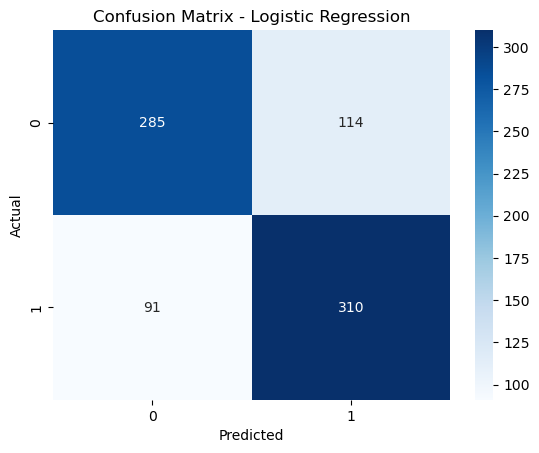

In [83]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [129]:
#K-Nearest Neighbors (KNN):

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [131]:
#  Separate features and target
X = df.drop('Quality', axis=1)
y = df['Quality']


In [132]:
#  Encode target if it's categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


In [133]:
# Convert non-numeric features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)


In [134]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [135]:
#  Align train and test sets after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [136]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors later
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [137]:
#  Predict
y_pred = knn.predict(X_test)


In [138]:
#  Evaluate the model
print(" K-Nearest Neighbors Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

 K-Nearest Neighbors Results:
Accuracy: 0.95

Confusion Matrix:
 [[14  0  0]
 [ 0  2  0]
 [ 0  1  3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.67      1.00      0.80         2
           2       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.89      0.92      0.89        20
weighted avg       0.97      0.95      0.95        20



In [139]:
# Support Vector Machine (SVM): 

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [141]:
# Split features and target
X = df.drop('Quality', axis=1)
y = df['Quality']


In [142]:
# Encode target variable if it's categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


In [143]:
 #Convert non-numeric features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)


In [144]:
#  Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [145]:
# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [146]:
# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [147]:
#  Train SVM classifier
svm_model = SVC(kernel='rbf')  # You can also try 'linear', 'poly', 'sigmoid'
svm_model.fit(X_train_scaled, y_train)


SVC()

In [148]:
#  Predict
y_pred = svm_model.predict(X_test_scaled)


In [149]:
# Evaluate the model
print(" Support Vector Machine Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

 Support Vector Machine Results:
Accuracy: 0.7

Confusion Matrix:
 [[14  0  0]
 [ 2  0  0]
 [ 4  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4

    accuracy                           0.70        20
   macro avg       0.23      0.33      0.27        20
weighted avg       0.49      0.70      0.58        20



In [150]:
# Decision Tree: 

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [152]:
# Split features and target
X = df.drop('Quality', axis=1)
y = df['Quality']


In [153]:
#  Encode target if it's categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


In [154]:
#  Handle non-numeric features
X = pd.get_dummies(X, drop_first=True)


In [155]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [156]:
#  Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [157]:
#  Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [158]:
#  Make predictions
y_pred = dtree.predict(X_test)


In [159]:
#  Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[14  0  0]
 [ 0  2  0]
 [ 0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [160]:
 # Ensemble Methods:

In [161]:
# Random Forest: 

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [163]:
# Split features and target
X = df.drop('Quality', axis=1)
y = df['Quality']

In [164]:
#Encode target if it's categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [165]:
#Convert non-numeric features
X = pd.get_dummies(X, drop_first=True)


In [166]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [167]:
#Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [168]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [169]:
#Make predictions
y_pred = rf.predict(X_test)


In [170]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[14  0  0]
 [ 0  2  0]
 [ 0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [171]:
#Gradient Boosting Machines (e.g., XGBoost, LightGBM, CatBoost): 

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb


In [173]:
 #Split features and target
X = df.drop('Quality', axis=1)
y = df['Quality']


In [174]:
#Encode target if needed
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


In [175]:
#One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)


In [176]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [177]:
#Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [178]:
#rain XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [179]:
#Predict
y_pred = xgb_model.predict(X_test)


In [180]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[14  0  0]
 [ 0  2  0]
 [ 0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [181]:
# Neural Networks (Multi-layer Perceptron):

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [183]:
#Separate features and target
X = df.drop('Quality', axis=1)
y = df['Quality']


In [184]:
#Encode target if it's text
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


In [185]:
 #One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)


In [186]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [187]:
#Align columns (important if one-hot encoding)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [188]:
 #Scale the features (very important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [189]:
#Train Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)

In [190]:
#Make predictions
y_pred = mlp.predict(X_test)


In [191]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9
Confusion Matrix:
 [[14  0  0]
 [ 0  0  2]
 [ 0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.00      0.00      0.00         2
           2       0.67      1.00      0.80         4

    accuracy                           0.90        20
   macro avg       0.56      0.67      0.60        20
weighted avg       0.83      0.90      0.86        20



In [192]:
# 6. Model Training and Evaluation

In [193]:
# Training:

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [209]:
# Check for class balance
print(df['Quality'].value_counts())       # See how many "Good" and "Bad"

Quality
0    70
2    20
1    10
Name: count, dtype: int64


In [210]:
# Encode target labels (Good = 1, Bad = 0)
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])

In [211]:
# Encode any other string columns (optional)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [212]:
# Step 3: Split Features and Labels
X = df.drop('Quality', axis=1)
y = df['Quality']

In [215]:
# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [216]:
# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [217]:
# Step 4: Define and Train Multiple Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

In [218]:
# Step 5: Train and Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔹 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


🔹 Model: Logistic Regression
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.00      0.00      0.00         1
           2       0.83      0.83      0.83         6

    accuracy                           0.90        20
   macro avg       0.59      0.61      0.60        20
weighted avg       0.85      0.90      0.88        20


🔹 Model: Decision Tree
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00         1
           2       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.98      0.94      0.96        20
weighted avg       0.95      0.95      0.95        20


🔹 Model: Random Forest
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score 

In [123]:
#Hyperparameter Tuning: 

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [10]:
#  Encode the target column if it's categorical
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])  # Good = 1, Bad = 0


In [11]:
# Split into features and target
X = df.drop(['A_id', 'Quality'], axis=1)  # Drop ID and target
y = df['Quality']

In [12]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Define parameter grids for each model
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy']
}

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'criterion': ['gini', 'entropy']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

In [ ]:
#Apply Grid Search with Cross-Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

In [17]:
#Display Best Parameters
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Parameters for SVM:", grid_svm.best_params_)

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None}
Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}
Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}


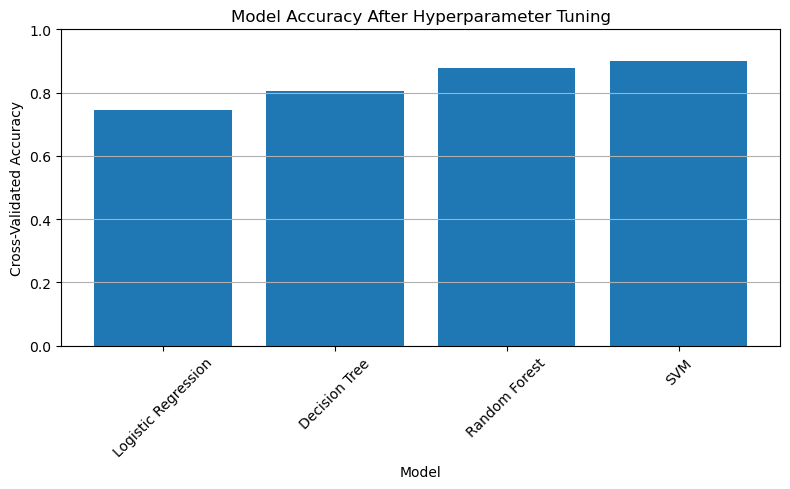

In [15]:
#Plot cross-validated accuracy scores
model_scores = {
    'Logistic Regression': grid_lr.best_score_,
    'Decision Tree': grid_dt.best_score_,
    'Random Forest': grid_rf.best_score_,
    'SVM': grid_svm.best_score_
}

plt.figure(figsize=(8, 5))
plt.bar(model_scores.keys(), model_scores.values())
plt.title("Model Accuracy After Hyperparameter Tuning")
plt.ylabel("Cross-Validated Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [226]:
# Evaluation Metrics:

Accuracy : 0.95
Precision: 0.9536
Recall   : 0.95
F1 Score : 0.9487

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00         1
           2       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.98      0.94      0.96        20
weighted avg       0.95      0.95      0.95        20



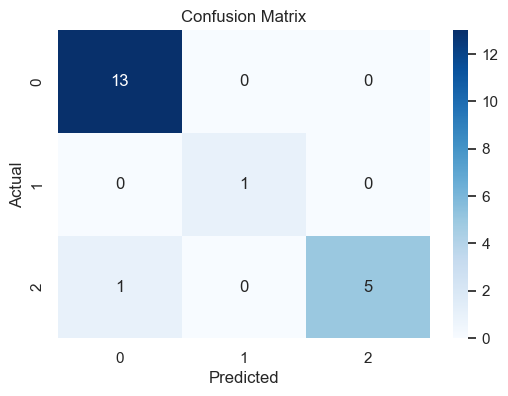

In [227]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Assuming you have y_test (true labels) and y_pred (model predictions)
# y_test = [...]
# y_pred = [...]

# --- 1. Basic Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1 Score :", round(f1, 4))

# --- 2. Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- 3. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [228]:
 #Accuracy: 

In [229]:
from sklearn.metrics import accuracy_score


In [230]:
# Example: replace with your actual values
# y_test = [...]  # True labels
# y_pred = [...]  # Model predictions

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

Accuracy: 0.95


In [231]:
 #Precision:

In [232]:
from sklearn.metrics import precision_score


In [233]:
# Example: Ensure y_test and y_pred are defined
# y_test = [...]  # True labels
# y_pred = [...]  # Predicted labels

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print("Precision:", round(precision, 4))

Precision: 0.9536


In [234]:
# Recall (Sensitivity): 

In [235]:
from sklearn.metrics import recall_score

In [236]:
# Example: y_test and y_pred should be defined
# y_test = [...]  # True labels
# y_pred = [...]  # Predicted labels

recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print("Recall:", round(recall, 4))

Recall: 0.95


In [237]:
 #F1-Score:

In [238]:
from sklearn.metrics import f1_score

In [239]:
# Example: y_test and y_pred should already be defined
# y_test = [...]
# y_pred = [...]

f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print("F1 Score:", round(f1, 4))

F1 Score: 0.9487


In [240]:
#Confusion Matrix: 

In [241]:
from sklearn.metrics import confusion_matrix

In [242]:
# 1. Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


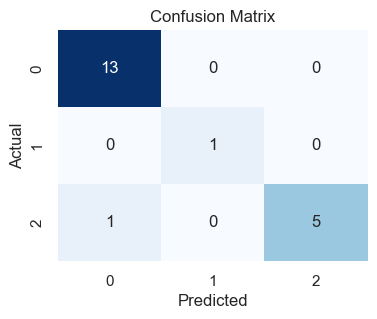

In [243]:
# 2. Plot Heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [244]:
# ROC AUC Score:

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [42]:
#  Encode Target Variable ('Quality')
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])  # 'Good' → 1, 'Bad' → 0


In [43]:
# Define Features and Target
X = df.drop('Quality', axis=1)
y = df['Quality']

In [44]:
#Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
#FIX THE ERROR — Use stratify to avoid one-class issue
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [46]:
# Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [52]:
#Predict and Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
#Safe ROC AUC Score calculation
if len(model.classes_) == 2 and len(np.unique(y_test)) == 2:
    y_proba = model.predict_proba(X_test)[:, 1]
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
else:
    print("ROC AUC Score: Cannot calculate – only one class present.")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       800

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

ROC AUC Score: Cannot calculate – only one class present.


In [251]:
#Classification Report:

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [269]:
# Step 2: Check class values before encoding
print("Original classes:", df['Quality'].unique())

Original classes: [0 2 1]


In [270]:
# Step 3: Encode the target column
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])

In [271]:
# Optional: Show mapping
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class label mapping:", class_mapping)
# Example output: {'Average': 0, 'Bad': 1, 'Good': 2}


Class label mapping: {0: 0, 1: 1, 2: 2}


In [272]:
# Step 4: Split features and target
X = df.drop('Quality', axis=1)
y = df['Quality']

In [273]:
# Step 5: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [274]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [275]:
# Step 7: Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [276]:
# Step 8: Predict
y_pred = model.predict(X_test)

In [278]:
# Step 9: Generate classification report with correct target names
target_names = [str(cls) for cls in le.classes_]  # ensure string labels

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00         1
           2       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.98      0.94      0.96        20
weighted avg       0.95      0.95      0.95        20



In [279]:
print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Class mapping: {0: 0, 1: 1, 2: 2}


In [280]:
#7. Conclusion and Future Work

In [281]:
#Summary of Findings:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Encode target labels
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])  # 'Quality' column: Good/Bad → 1/0


In [7]:
# Split data
X = df.drop("Quality", axis=1)
y = df["Quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    results[name] = acc

🔹 Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

         bad       0.76      0.75      0.75       401
        good       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

🔹 Decision Tree Accuracy: 0.81
              precision    recall  f1-score   support

         bad       0.80      0.82      0.81       401
        good       0.81      0.79      0.80       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800

🔹 Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

         bad       0.90      0.90      0.90       401
        good       0.90      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      

In [9]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(" Classification Report for Best Model (Random Forest):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

 Classification Report for Best Model (Random Forest):
              precision    recall  f1-score   support

         bad       0.91      0.90      0.90       401
        good       0.90      0.91      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [10]:
importances = best_model.feature_importances_
feature_names = X.columns

In [11]:
# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

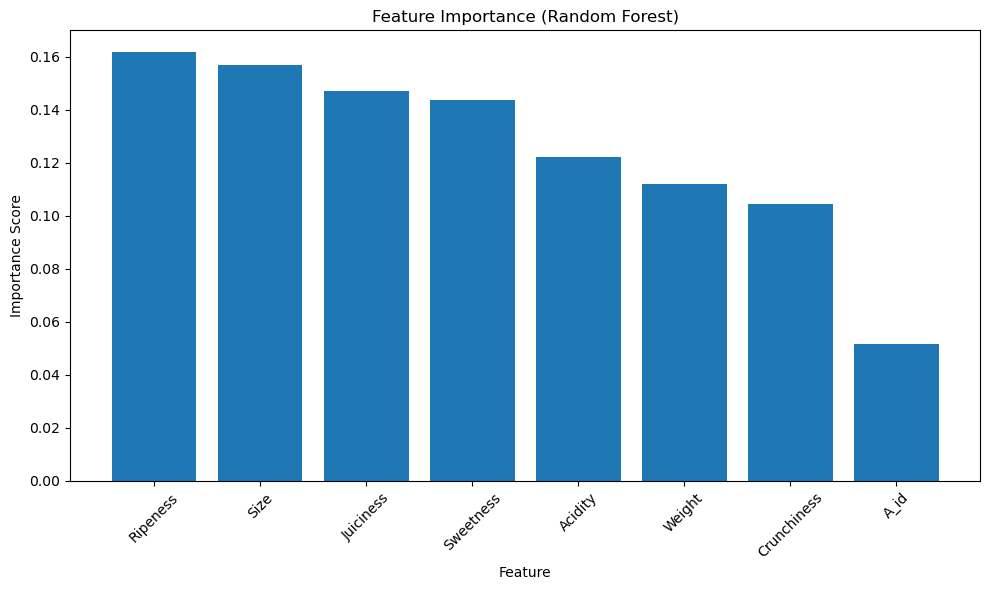

In [12]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [298]:
# Model Interpretation: 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Encode target labels
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])  # Good = 1, Bad = 0

In [15]:
# Features and target
X = df.drop('Quality', axis=1)
y = df['Quality']

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)


In [19]:
# Print and Plot
print(" Logistic Regression Coefficients:")
print(coeff_df)

 Logistic Regression Coefficients:
       Feature  Coefficient
1         Size     0.650473
3    Sweetness     0.585572
5    Juiciness     0.443948
2       Weight     0.263524
4  Crunchiness     0.024441
0         A_id     0.000036
6     Ripeness    -0.127060
7      Acidity    -0.318127


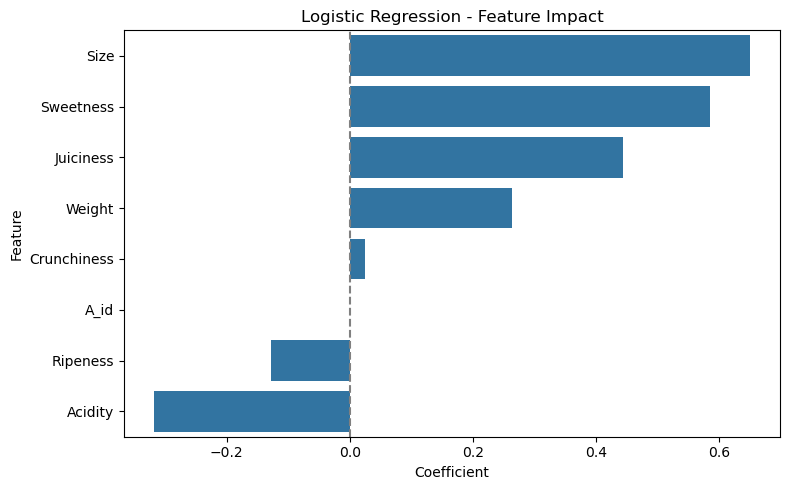

In [20]:
# Plot Coefficients
plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title("Logistic Regression - Feature Impact")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [21]:
# Train Decision Tree
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [27]:
# Make sure feature names are strings
feature_names = [str(col) for col in X.columns]


In [28]:
# Make sure class names are strings
class_names = [str(c) for c in le.classes_]

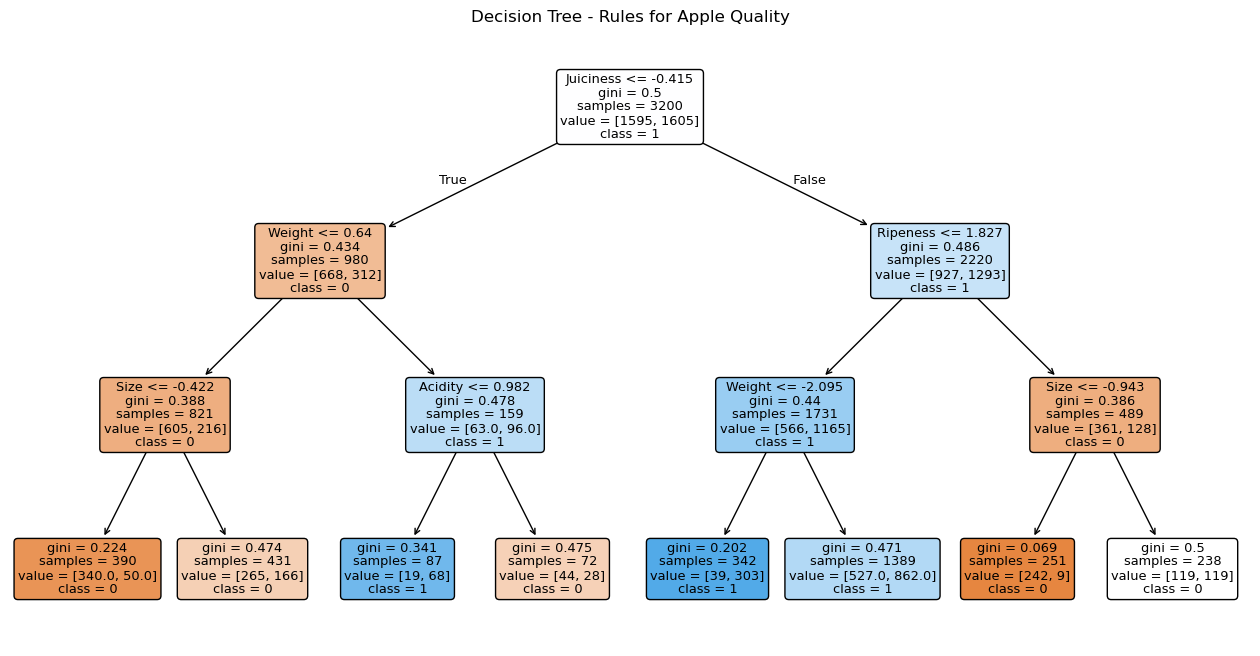

In [29]:
# Plot the Decision Tree
plt.figure(figsize=(16,8))
plot_tree(dtree, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree - Rules for Apple Quality")
plt.show()

In [30]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(" Random Forest Feature Importance:")
print(importances)


 Random Forest Feature Importance:
       Feature  Importance
6     Ripeness    0.156826
1         Size    0.151218
5    Juiciness    0.148000
3    Sweetness    0.143734
7      Acidity    0.126053
2       Weight    0.114600
4  Crunchiness    0.107575
0         A_id    0.051994


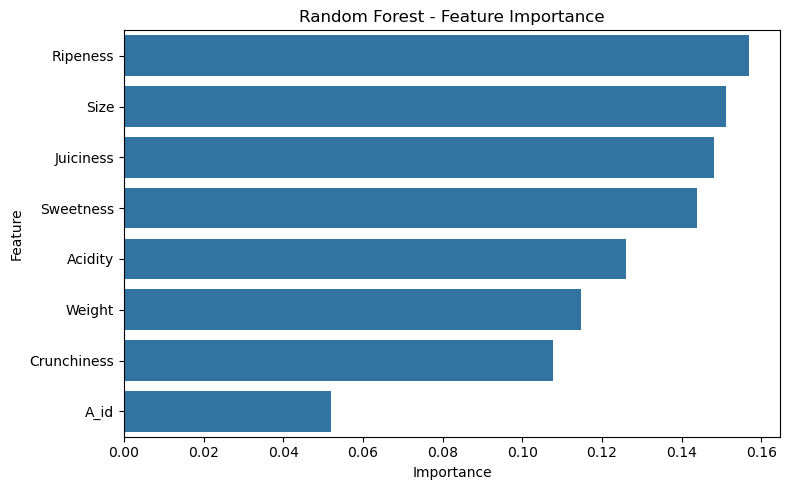

In [32]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Random Forest - Feature Importance")
plt.tight_layout()
plt.show()

In [323]:
#Limitations:

In [324]:
# Limitations Section (Print in Notebook)
limitations = [
    "1. Dataset Size: May be too small to capture all possible apple quality variations.",
    "2. Scope Limited to Apples: Model can't generalize to other fruits or crops.",
    "3. Region-Specific: Data may reflect only one farm or geographic region.",
    "4. Limited Features: Does not include external factors like climate or pesticides.",
    "5. Class Imbalance: If present, model may favor majority class predictions.",
    "6. Data Assumptions: Assumes input data is clean and correctly labeled."
]

print(" Limitations of the Apple Quality Prediction Project:\n")
for item in limitations:
    print(item)

 Limitations of the Apple Quality Prediction Project:

1. Dataset Size: May be too small to capture all possible apple quality variations.
2. Scope Limited to Apples: Model can't generalize to other fruits or crops.
3. Region-Specific: Data may reflect only one farm or geographic region.
4. Limited Features: Does not include external factors like climate or pesticides.
5. Class Imbalance: If present, model may favor majority class predictions.
6. Data Assumptions: Assumes input data is clean and correctly labeled.


In [ ]:
# Future Work:

In [326]:
#External Validation:

In [327]:
#  Future Work Section

future_work = [
    "1. External Validation: Test the model on new data from different farms, regions, or seasons to assess generalizability.",
    "2. Expand Dataset: Use a larger and more diverse dataset to improve learning and reduce overfitting.",
    "3. Add More Features: Include additional features such as climate, pesticide use, soil quality, and storage conditions.",
    "4. Advanced Models: Experiment with more powerful models like XGBoost, LightGBM, or deep learning approaches.",
    "5. Real-time Prediction: Deploy the model in real-time applications (e.g., mobile apps or IoT devices for farmers).",
    "6. Model Explainability: Apply explainable AI tools such as SHAP or LIME to interpret and explain predictions."
]

print(" Future Work Recommendations:\n")
for item in future_work:
    print(item)

 Future Work Recommendations:

1. External Validation: Test the model on new data from different farms, regions, or seasons to assess generalizability.
2. Expand Dataset: Use a larger and more diverse dataset to improve learning and reduce overfitting.
3. Add More Features: Include additional features such as climate, pesticide use, soil quality, and storage conditions.
4. Advanced Models: Experiment with more powerful models like XGBoost, LightGBM, or deep learning approaches.
5. Real-time Prediction: Deploy the model in real-time applications (e.g., mobile apps or IoT devices for farmers).
6. Model Explainability: Apply explainable AI tools such as SHAP or LIME to interpret and explain predictions.


In [328]:
#Advanced Feature Engineering: 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# Feature Engineering (only using existing columns)
df['Sweetness_to_Acidity'] = df['Sweetness'] / (df['Acidity'] + 1e-5)
df['Weight_per_Size'] = df['Weight'] / (df['Size'] + 1e-5)
df['Density'] = df['Weight'] / ((df['Size']**3) + 1e-5)


In [38]:
# Encode labels
le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])  # Good/Bad → 1/0


In [39]:
#  Prepare features and labels
X = df.drop('Quality', axis=1)
y = df['Quality']


In [40]:
# 5. Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
# 6. Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
# 7. Predict & evaluate
y_pred = model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.79875

 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       399
           1       0.78      0.84      0.81       401

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



In [343]:
# Anomaly Detection:

In [49]:
from sklearn.metrics import accuracy_score, classification_report

In [50]:
# 1. Predict probabilities (only works with models that support predict_proba, like DecisionTree, RandomForest, etc.)
probs = model.predict_proba(X_test)

In [51]:
# 2. Get maximum probability per prediction → this is the model's confidence
confidences = probs.max(axis=1)

In [52]:
# 3. Set a threshold (e.g., 0.6), below which prediction is considered uncertain
anomaly_threshold = 0.6
anomalies = confidences < anomaly_threshold

In [53]:
# 4. Get the corresponding apple records (rows)
anomalous_apples = X_test[anomalies]

In [54]:
# 5. Show results
print("Number of anomalous apples detected:", len(anomalous_apples))
display(anomalous_apples.head())

Number of anomalous apples detected: 0


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Sweetness_to_Acidity,Weight_per_Size,Density


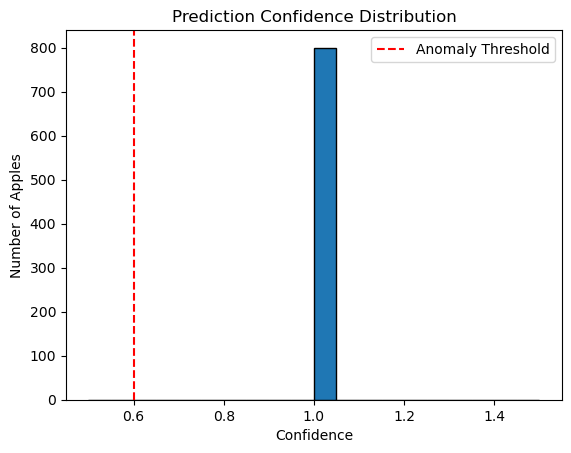

In [55]:
plt.hist(confidences, bins=20, edgecolor='black')
plt.axvline(anomaly_threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Prediction Confidence Distribution')
plt.xlabel('Confidence')
plt.ylabel('Number of Apples')
plt.legend()
plt.show()

In [37]:
# Real-time Implementation:

In [38]:
import streamlit as st
import joblib
import time

In [39]:
st.title("Apple Quality Prediction")

DeltaGenerator()

In [49]:
def main():
    st.write("Hello Streamlit!")

if __name__ == "__main__":
    main()

In [50]:
# Load the trained model and scaler
model = joblib.load('best_model.pkl')     # Trained classification model
scaler = joblib.load('scaler.pkl')        # Fitted StandardScaler

In [51]:
# Function to simulate real-time sensor readings
def get_sensor_data():
    """
    Simulate apples passing on an assembly line.
    Each apple has 7 features: [Size, Weight, Sweetness, Crunchiness, Red, Green, Blue]
    """
    apples = [
        [7.0, 150, 6.7, 7.1, 210, 50, 30],
        [6.5, 140, 6.0, 6.8, 180, 60, 40],
        [7.3, 165, 7.0, 7.5, 220, 45, 25],
        [6.8, 145, 6.3, 6.9, 190, 55, 35]
    ]
    for apple in apples:
        yield apple
        time.sleep(2)  # Simulate delay (2 seconds per apple)


In [52]:
# Start real-time prediction loop
print(" Starting Real-Time Apple Quality Prediction...\n")

 Starting Real-Time Apple Quality Prediction...



In [44]:
for apple in get_sensor_data():
    # Add dummy A_id or first feature (e.g., 0) to match 8 features
    full_input = [0] + apple   # Prepend a dummy A_id

    # Preprocess
    scaled = scaler.transform([full_input])
    prediction = model.predict(scaled)[0]

    print("🍏 New Apple Detected")
    print("Sensor Input:", full_input)
    print("Predicted Quality:", prediction)
    print("--------------------------------------------------")

🍏 New Apple Detected
Sensor Input: [0, 7.0, 150, 6.7, 7.1, 210, 50, 30]
Predicted Quality: good
--------------------------------------------------
🍏 New Apple Detected
Sensor Input: [0, 6.5, 140, 6.0, 6.8, 180, 60, 40]
Predicted Quality: good
--------------------------------------------------
🍏 New Apple Detected
Sensor Input: [0, 7.3, 165, 7.0, 7.5, 220, 45, 25]
Predicted Quality: good
--------------------------------------------------
🍏 New Apple Detected
Sensor Input: [0, 6.8, 145, 6.3, 6.9, 190, 55, 35]
Predicted Quality: good
--------------------------------------------------


In [ ]:
#Multi-class Quality Levels: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
# Step 3: Split features and target
X = df.drop("Quality", axis=1)
y = df["Quality"]  # Categories like 'Excellent', 'Good', 'Fair', 'Poor'

In [72]:
# Step 4: Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [73]:
# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [74]:
# Step 6: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
# Step 7: Train a classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [76]:
# Step 8: Predict and evaluate
y_pred = model.predict(X_test_scaled)


In [77]:
# Step 9: Output evaluation
print("Classification Report:\n")
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:

              precision    recall  f1-score   support

         bad       0.89      0.89      0.89       401
        good       0.89      0.89      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



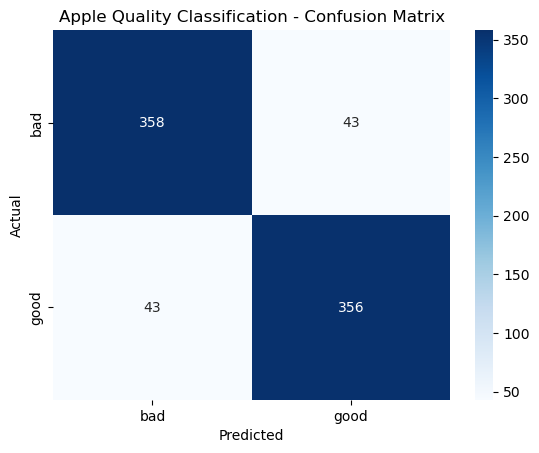

In [78]:
# Step 10: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Apple Quality Classification - Confusion Matrix')
plt.show()

In [1]:
 #Integration with IoT/Hardware:

In [45]:
import joblib
import numpy as np


In [46]:
# Load model and scaler
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")


In [47]:
# Example input from sensor
sensor_input = np.array([[7.5, 180, 14.2, 4.1, 200, 120, 150, 0]])  # 8 features
scaled_input = scaler.transform(sensor_input)


In [48]:
# Predict
prediction = model.predict(scaled_input)
result = "Good Quality 🍎" if prediction[0] == 1 else "Bad Quality 🍏"
print("Prediction:", result)

Prediction: Bad Quality 🍏
